<a href="https://colab.research.google.com/github/dianafebrinalt/OptimalisasiMetodeKlasifikasiKankerParuMenggunakanMachineLearningBerbasisEDA/blob/main/PENELITIAN_SKRIPSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARY

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#PENGAMBILAN DATA DARI GOOGLE DRIVE
df=pd.read_csv(r'/content/drive/MyDrive/DATA PENELITIAN SKRIPSI/lung_cancer.csv')
df.head(100)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,P184,26,1,6,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
96,96,P185,37,1,6,7,7,7,7,7,...,8,5,7,6,7,8,7,6,2,High
97,97,P186,28,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
98,98,P187,19,1,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High


In [ ]:
df.tail()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
999,999,P999,47,1,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


In [ ]:
df.dtypes

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

In [ ]:
print("Jumlah Baris dalam Dataset adalah: ", df.shape[0], "baris")
print("Jumlah Kolom dalam Dataset adalah: ", df.shape[1], "kolom")

Jumlah Baris dalam Dataset adalah:  1000 baris
Jumlah Kolom dalam Dataset adalah:  26 kolom


# **DATA** **PREPARATION**

In [ ]:
#mengganti nama kolom menjadi bahasa indonesia
df.rename(columns={'index': 'Indeks',
                   'Patient Id': 'ID Pasien',
                   'Age': 'Umur',
                   'Gender': 'Jenis Kelamin',
                   'Air Pollution': 'Polusi Udara',
                   'Alcohol use': 'Alkohol',
                   'Dust Allergy': 'Alergi Debu',
                   'OccuPational Hazards': 'Bahaya Pekerjaan',
                   'Genetic Risk': 'Faktor Gen',
                   'chronic Lung Disease': 'Penyakit Paru-paru kronis',
                   'Balanced Diet': 'Diet Seimbang',
                   'Obesity': 'Obesitas',
                   'Smoking': 'Merokok',
                   'Passive Smoker': 'Perokok Pasif',
                   'Chest Pain': 'Sakit Dada',
                   'Coughing of Blood': 'Batuk Berdarah',
                   'Fatigue': 'Kelelahan',
                   'Weight Loss': 'Penurunan Berat Badan',
                   'Shortness of Breath': 'Sesak Nafas',
                   'Wheezing': 'Asma',
                   'Swallowing Difficulty': 'Sulit Menelan',
                   'Clubbing of Finger Nails': 'Kelainan Bentuk Kuku Jari',
                   'Frequent Cold': 'Kedinginan',
                   'Dry Cough': 'Batuk Kering',
                   'Snoring': 'Dengkur',
                   'Level': 'Level'}, inplace=True)

In [ ]:
#Kemudian di cek datanya yang nama kolomnya dah berubah tadi
df.head()

,Umur,Jenis Kelamin,Polusi Udara,Alkohol,Alergi Debu,Bahaya Pekerjaan,Faktor Gen,Penyakit Paru-paru kronis,Diet Seimbang,Obesitas,...,Kelelahan,Penurunan Berat Badan,Sesak Nafas,Asma,Sulit Menelan,Kelainan Bentuk Kuku Jari,Kedinginan,Batuk Kering,Dengkur,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


In [ ]:
#Menghapus data yang di duplikasi
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Indeks                     1000 non-null   int64 
 1   ID Pasien                  1000 non-null   object
 2   Umur                       1000 non-null   int64 
 3   Jenis Kelamin              1000 non-null   int64 
 4   Polusi Udara               1000 non-null   int64 
 5   Alkohol                    1000 non-null   int64 
 6   Alergi Debu                1000 non-null   int64 
 7   Bahaya Pekerjaan           1000 non-null   int64 
 8   Faktor Gen                 1000 non-null   int64 
 9   Penyakit Paru-paru kronis  1000 non-null   int64 
 10  Diet Seimbang              1000 non-null   int64 
 11  Obesitas                   1000 non-null   int64 
 12  Merokok                    1000 non-null   int64 
 13  Perokok Pasif              1000 non-null   int64 
 14  Sakit Dad

In [ ]:
# MELIHAT JUMLAH DARI LEVEL UNTUK NGELIAT LEVEL MASING-MASING PREDIKSI DARI KLASIFIKASI INI
print(df['Level'].value_counts())
cls_0=df[df['Level']==0]
cls_1=df[df['Level']==1]

2    365
1    332
0    303
Name: Level, dtype: int64


VISUALISASI DATA DARI LEVEL

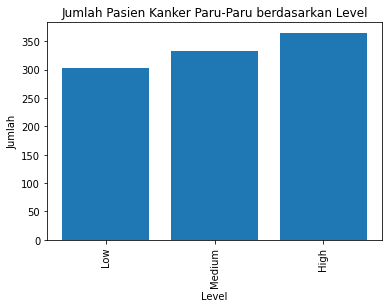

In [ ]:
vis1 = df.groupby(['Level']).count().reset_index()
vis1.sort_values('ID Pasien', ascending=True, inplace=True)
fig = plt.figure(figsize=(6,4))
ax = plt.axes()
plt.ylabel('Jumlah')
plt.xlabel('Level')
plt.title('Jumlah Pasien Kanker Paru-Paru berdasarkan Level')
ax.bar(vis1['Level'],vis1['ID Pasien'])
plt.xticks(rotation=90)
plt.show()

MISSING VALUE HANDLING

In [ ]:
df.isnull().sum()

Indeks                       0
ID Pasien                    0
Umur                         0
Jenis Kelamin                0
Polusi Udara                 0
Alkohol                      0
Alergi Debu                  0
Bahaya Pekerjaan             0
Faktor Gen                   0
Penyakit Paru-paru kronis    0
Diet Seimbang                0
Obesitas                     0
Merokok                      0
Perokok Pasif                0
Sakit Dada                   0
Batuk Berdarah               0
Kelelahan                    0
Penurunan Berat Badan        0
Sesak Nafas                  0
Asma                         0
Sulit Menelan                0
Kelainan Bentuk Kuku Jari    0
Kedinginan                   0
Batuk Kering                 0
Dengkur                      0
Level                        0
dtype: int64

In [ ]:
df.describe()

,Umur,Jenis Kelamin,Polusi Udara,Alkohol,Alergi Debu,Bahaya Pekerjaan,Faktor Gen,Penyakit Paru-paru kronis,Diet Seimbang,Obesitas,...,Kelelahan,Penurunan Berat Badan,Sesak Nafas,Asma,Sulit Menelan,Kelainan Bentuk Kuku Jari,Kedinginan,Batuk Kering,Dengkur,Level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,1.062000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.000000


In [ ]:
df.fillna(df.mean(), inplace=True)

<ipython-input-156-bf934754a5b1>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Indeks                     1000 non-null   int64 
 1   ID Pasien                  1000 non-null   object
 2   Umur                       1000 non-null   int64 
 3   Jenis Kelamin              1000 non-null   int64 
 4   Polusi Udara               1000 non-null   int64 
 5   Alkohol                    1000 non-null   int64 
 6   Alergi Debu                1000 non-null   int64 
 7   Bahaya Pekerjaan           1000 non-null   int64 
 8   Faktor Gen                 1000 non-null   int64 
 9   Penyakit Paru-paru kronis  1000 non-null   int64 
 10  Diet Seimbang              1000 non-null   int64 
 11  Obesitas                   1000 non-null   int64 
 12  Merokok                    1000 non-null   int64 
 13  Perokok Pasif              1000 non-null   int64 
 14  Sakit Dad

In [ ]:
#untuk menghapus kolom yang tidak mempengaruhi klasifikasi
df.drop(['Indeks', 'ID Pasien'], axis=1, inplace=True)
df.head()

,Umur,Jenis Kelamin,Polusi Udara,Alkohol,Alergi Debu,Bahaya Pekerjaan,Faktor Gen,Penyakit Paru-paru kronis,Diet Seimbang,Obesitas,...,Kelelahan,Penurunan Berat Badan,Sesak Nafas,Asma,Sulit Menelan,Kelainan Bentuk Kuku Jari,Kedinginan,Batuk Kering,Dengkur,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
#MENGUBAH LEVEL MENJADI NUMERIC
df.Level.unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [ ]:
df.Level = df["Level"].map({'Low': 0, 'Medium': 1, 'High':2})
df.head()

,Umur,Jenis Kelamin,Polusi Udara,Alkohol,Alergi Debu,Bahaya Pekerjaan,Faktor Gen,Penyakit Paru-paru kronis,Diet Seimbang,Obesitas,...,Kelelahan,Penurunan Berat Badan,Sesak Nafas,Asma,Sulit Menelan,Kelainan Bentuk Kuku Jari,Kedinginan,Batuk Kering,Dengkur,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


# **EXPLORATORY DATA ANALYSIS**

DATA EXPLORATION
PENGECEKAN KORELASI ANTAR FITUR

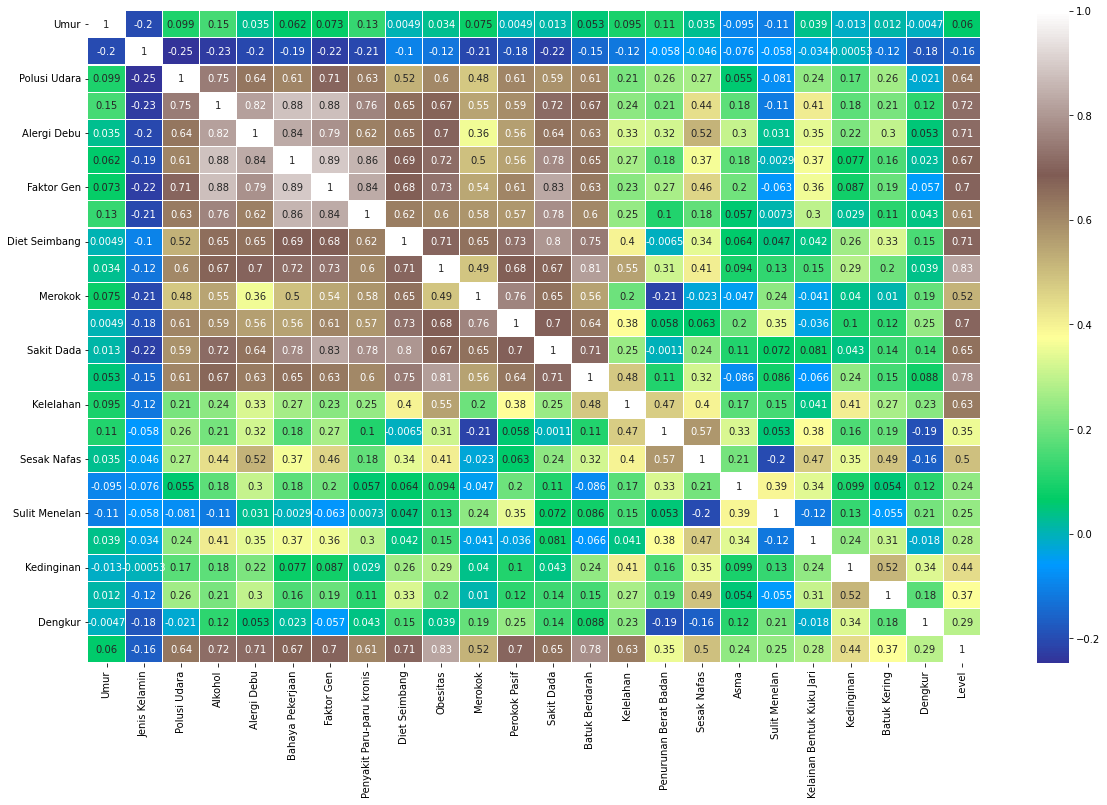

In [ ]:
#MEMBUAT TABEL KORELASI
sns.heatmap(df.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

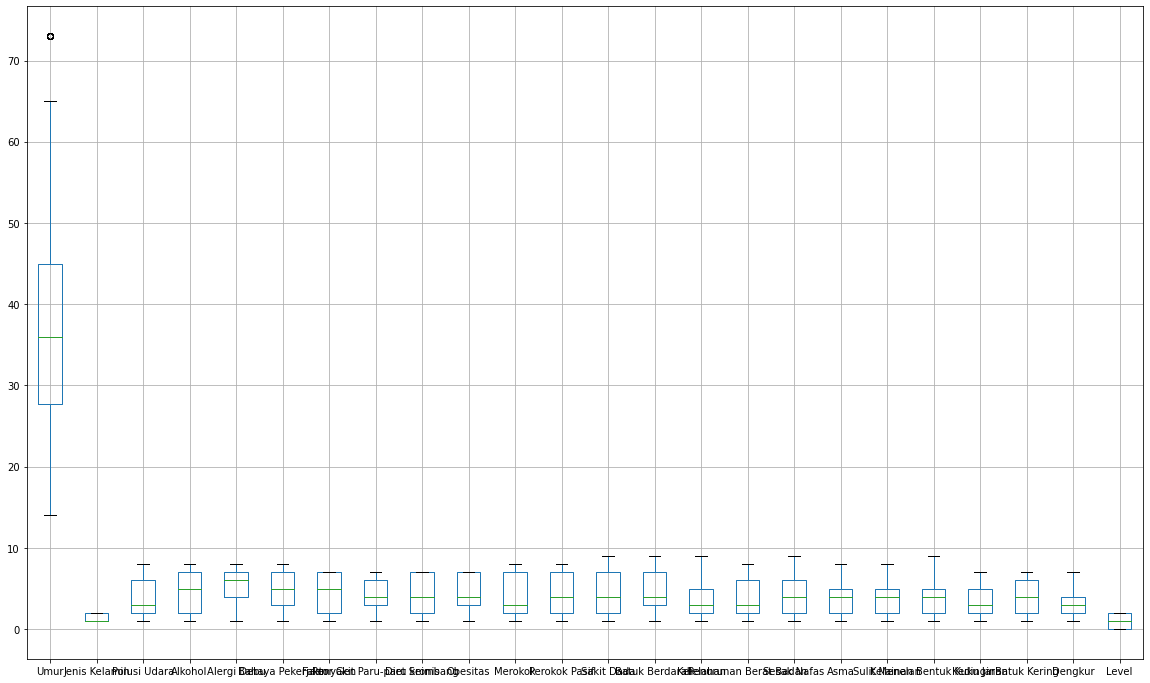

In [ ]:
#PENGECEKAN OUTLIER
df.boxplot(figsize=(20,12))

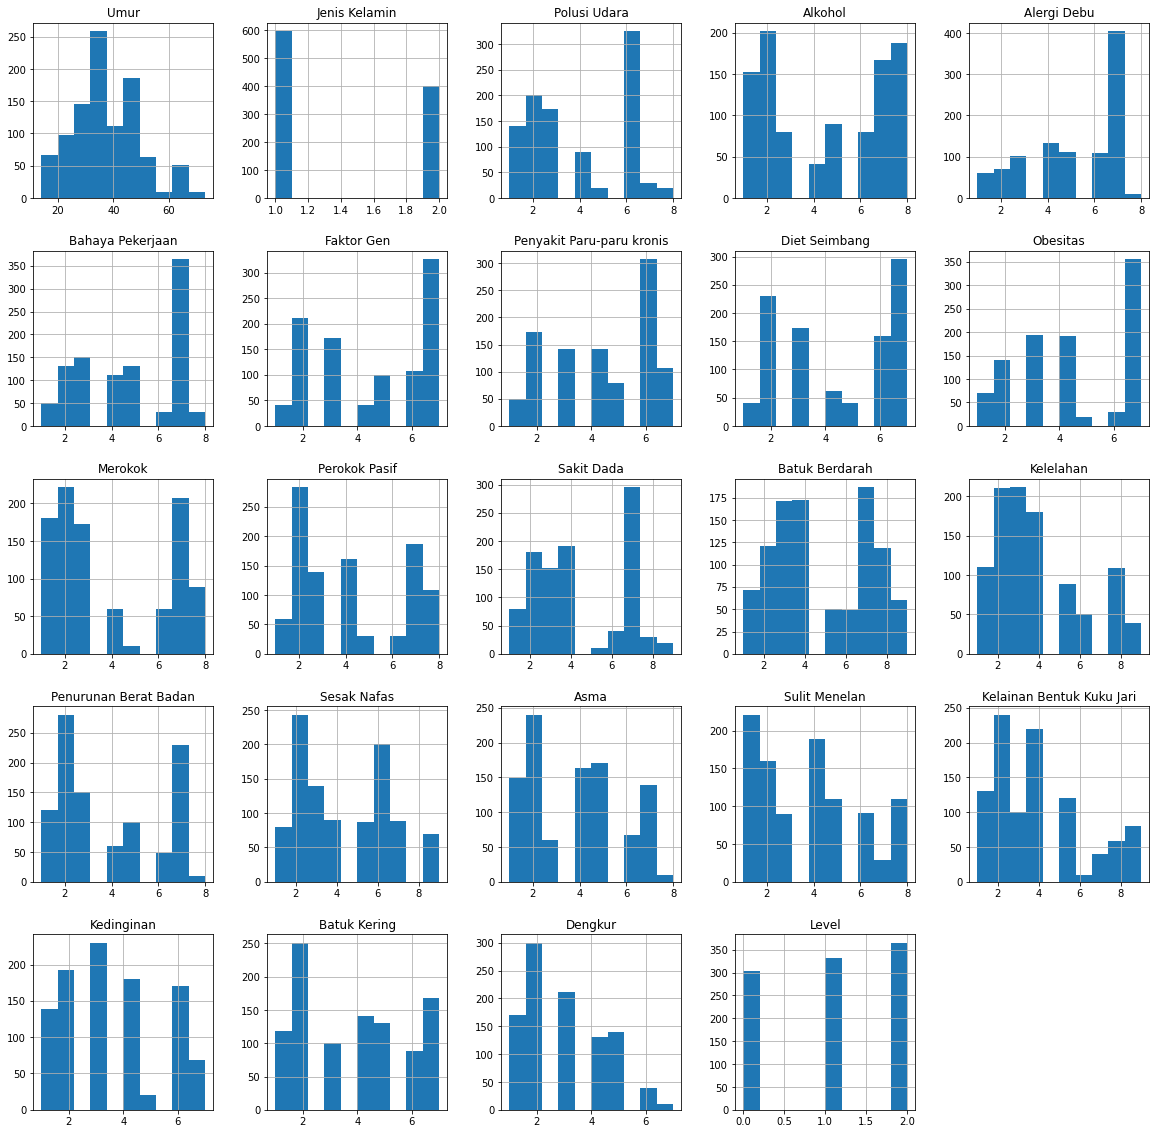

In [ ]:
#PENGECEKAN PERSEBARAN DATA 
df.hist(figsize=(20,20))
plt.show()

SPLITTING TEST

In [ ]:
X=df.drop(['Level'],axis=1)
Y=df['Level']

In [ ]:
#FAKTOR YANG MEMPENGARUHI
X.head()

,Umur,Jenis Kelamin,Polusi Udara,Alkohol,Alergi Debu,Bahaya Pekerjaan,Faktor Gen,Penyakit Paru-paru kronis,Diet Seimbang,Obesitas,...,Batuk Berdarah,Kelelahan,Penurunan Berat Badan,Sesak Nafas,Asma,Sulit Menelan,Kelainan Bentuk Kuku Jari,Kedinginan,Batuk Kering,Dengkur
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [ ]:
#import library data partitioning/splitting data dan konfigurasi
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=101,shuffle=True)

In [ ]:
#import library algoritma SVM
from sklearn.svm import LinearSVC

svmc =LinearSVC()
svmc.fit(X_train,Y_train)

Y_pred_svmc = svmc.predict(X_test)


accuracy_svmc=accuracy_score(Y_test,Y_pred_svmc)
accuracy_svmc

#Untuk ngecek apakah data kita bagus atau tidak
#Jika diatas 90 maka itu bagus

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.98

In [ ]:
print("accuracy on training set: {:.3f}". format(svmc.score(X_train,Y_train)))
print("accuracy on test set: {:.3f}".format(svmc.score(X_test,Y_test)))

accuracy on training set: 0.988
accuracy on test set: 0.980


In [ ]:
#import library KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
Y_pred_knn = knn.predict(X_test)

In [ ]:
accuracy_knn=accuracy_score(Y_test,Y_pred_knn)
accuracy_knn

0.99

In [ ]:
print("accuracy on training set: {:.3f}". format(knn.score(X_train,Y_train)))
print("accuracy on test set: {:.3f}".format(knn.score(X_test,Y_test)))

accuracy on training set: 1.000
accuracy on test set: 0.990


In [ ]:
#import library Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

accuracy_lr=accuracy_score(Y_test,Y_pred_lr)
accuracy_lr

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.99

In [ ]:
print("accuracy on training set: {:.3f}". format(lr.score(X_train,Y_train)))
print("accuracy on test set: {:.3f}".format(lr.score(X_test,Y_test)))

accuracy on training set: 0.996
accuracy on test set: 0.990


In [ ]:
#import library algoritma Naive Bayes
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,Y_train)

Y_pred_gnb = gnb.predict(X_test)


accuracy_gnb=accuracy_score(Y_test,Y_pred_gnb)
accuracy_gnb

0.885

In [ ]:
print("accuracy on training set: {:.3f}". format(gnb.score(X_train,Y_train)))
print("accuracy on test set: {:.3f}".format(gnb.score(X_test,Y_test)))

accuracy on training set: 0.904
accuracy on test set: 0.885


In [ ]:
#import library algoritma Decision Tree
from sklearn.tree import DecisionTreeClassifier


dtMaxDepth6 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0,
            random_state=1538259045, splitter='best')

# Sesuaikan dt ke set training
dtMaxDepth6.fit(X_train, Y_train)

# Memprediksi label set test
y_pred_dtMaxDepth6 = dtMaxDepth6.predict(X_test)

#  menghitung set accuracy
acc_dt = accuracy_score(Y_test, y_pred_dtMaxDepth6)
print("Metode Decision Tree Using Depth = 6")
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Metode Decision Tree Using Depth = 6
Test set accuracy: 1.00
Test set accuracy: 1.0


In [ ]:
dtMaxDepth3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0,
            random_state=1538259045, splitter='best')

# Sesuaikan dt ke set training
dtMaxDepth3.fit(X_train, Y_train)

# Memprediksi label set test
y_pred_dtMaxDepth3 = dtMaxDepth3.predict(X_test)

#  menghitung set accuracy
acc_dt = accuracy_score(Y_test, y_pred_dtMaxDepth3)
print("Metode Decision Tree Using Depth = 3")
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Metode Decision Tree Using Depth = 3
Test set accuracy: 0.93
Test set accuracy: 0.925


In [ ]:
dtMaxDepth1 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0,
            random_state=1538259045, splitter='best')

# Sesuaikan dt ke set training
dtMaxDepth1.fit(X_train, Y_train)

# Memprediksi label set test
y_pred_dtMaxDepth1 = dtMaxDepth1.predict(X_test)

#  menghitung set accuracy
acc_dt = accuracy_score(Y_test, y_pred_dtMaxDepth1)
print("Metode Decision Tree Using Depth = 1")
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Metode Decision Tree Using Depth = 1
Test set accuracy: 0.62
Test set accuracy: 0.62


In [ ]:
# Building Final Model of Decission Tree
tree = DecisionTreeClassifier(max_depth=1).fit(X_train, Y_train)
tree_score = tree.score(X_test, Y_test)

In [ ]:
#import library algoritma Random Forest
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier()
rforest.fit(X_train,Y_train)

Y_pred_rforest = rforest.predict(X_test)

train_accuracy = []
test_accuracy = []
for i in [5, 20, 50, 75, 100]:
    forest = RandomForestClassifier(n_estimators=i, random_state=101).fit(X_train, Y_train)
    train_accuracy.append(forest.score(X_train, Y_train))
    test_accuracy.append(forest.score(X_test, Y_test))
    
pd.DataFrame({'n_estimator':[5,20,50,75,100], 'train_accuracy':train_accuracy, 'test_accuracy':test_accuracy}).set_index('n_estimator').transpose()

n_estimator,5,20,50,75,100
train_accuracy,1.0,1.0,1.0,1.0,1.0
test_accuracy,1.0,1.0,1.0,1.0,1.0


In [ ]:
# Building the best model of Random Forest
forest = RandomForestClassifier(n_estimators=100).fit(X_train, Y_train)
forest_score = forest.score(X_test, Y_test)

In [ ]:
#import library algoritma Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier

gboost = RandomForestClassifier()
gboost.fit(X_train,Y_train)

Y_pred_gboost = gboost.predict(X_test)

train_accuracy = []
test_accuracy = []
for i in [0.001,0.01,0.1,1]:
    boost = GradientBoostingClassifier(learning_rate=i).fit(X_train, Y_train)
    train_accuracy.append(boost.score(X_train, Y_train))
    test_accuracy.append(boost.score(X_test, Y_test))
    
pd.DataFrame({'learning_rate':[0.001,0.01,0.1,1], 'train_accuracy':train_accuracy, 'test_accuracy':test_accuracy}).set_index('learning_rate').transpose()

learning_rate,0.001,0.010,0.100,1.000
train_accuracy,0.965,1.0,1.0,1.0
test_accuracy,0.935,1.0,1.0,1.0


In [ ]:
# Building the best model of Gradient Boosting Classifier
boost = GradientBoostingClassifier(learning_rate= 0.1).fit(X_train,Y_train)
boost_score = boost.score(X_test, Y_test)

In [ ]:
#import library algoritma Kernel SVM Model
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,Y_train)

Y_pred_svc = svc.predict(X_test)


accuracy_svc=accuracy_score(Y_test,Y_pred_svc)
accuracy_svc

0.975

In [ ]:
print("accuracy on training set: {:.3f}". format(svc.score(X_train,Y_train)))
print("accuracy on test set: {:.3f}".format(svc.score(X_test,Y_test)))

accuracy on training set: 0.981
accuracy on test set: 0.975


In [ ]:
#import library algoritma MLP Classifier
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier()
mlpc.fit(X_train,Y_train)

Y_pred_mlpc = mlpc.predict(X_test)

train_accuracy = []
test_accuracy = []
for i in [[10],[10,10], [20,20]]:
    mlp = MLPClassifier(activation='tanh', random_state=0, hidden_layer_sizes=i).fit(X_train, Y_train)
    train_accuracy.append(mlp.score(X_train, Y_train))
    test_accuracy.append(mlp.score(X_test, Y_test))
    
pd.DataFrame({'hidden_layers':['10','10,10','20,20'], 'train_accuracy':train_accuracy, 'test_accuracy':test_accuracy}).set_index('hidden_layers').transpose()

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


hidden_layers,10,"10,10","20,20"
train_accuracy,0.97625,1.0,1.000
test_accuracy,0.94500,1.0,0.995


In [ ]:
# Final Model of MLP Classifier
mlp = MLPClassifier(activation='tanh', random_state=0, hidden_layer_sizes=[20,20]).fit(X_train, Y_train)
mlp_score = mlp.score(X_test, Y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**MODEL EVALUATION**

In [ ]:
# IMPORT LIBRARY EVALUATION
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report

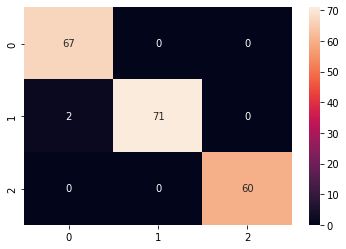

In [ ]:
# MEMBUAT CONFUSION MATRIX LOGISTIC REGRESSION
grid_lr_matrix = confusion_matrix(Y_test, Y_pred_lr)

# VISUALISASI CONFUSION MATRIX
sns.heatmap(grid_lr_matrix, annot=True)

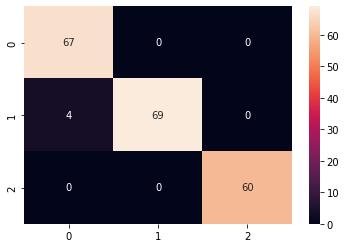

In [ ]:
# MEMBUAT CONFUSION MATRIX Linear SVM
grid_svmc_matrix = confusion_matrix(Y_test, Y_pred_svmc)

# VISUALISASI CONFUSION MATRIX
sns.heatmap(grid_svmc_matrix, annot=True)

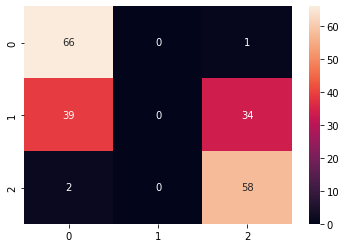

In [ ]:
# MEMBUAT CONFUSION MATRIX Decission Tree
grid_dtMaxDepth1_matrix = confusion_matrix(Y_test, y_pred_dtMaxDepth1)
# VISUALISASI CONFUSION MATRIX
sns.heatmap(grid_dtMaxDepth1_matrix, annot=True)

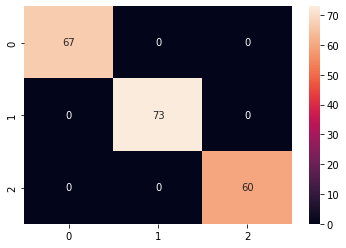

In [ ]:
# MEMBUAT CONFUSION MATRIX RANDOM TREE
grid_rforest_matrix = confusion_matrix(Y_test, Y_pred_rforest)

# VISUALISASI CONFUSION MATRIX
sns.heatmap(grid_rforest_matrix, annot=True)

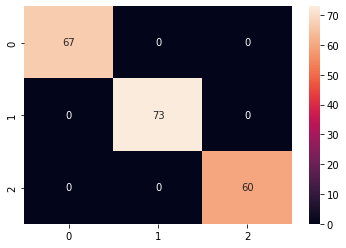

In [ ]:
# MEMBUAT CONFUSION MATRIX GRADIENT BOOSTING
grid_gboost_matrix = confusion_matrix(Y_test, Y_pred_gboost)

# VISUALISASI CONFUSION MATRIX
sns.heatmap(grid_gboost_matrix, annot=True)

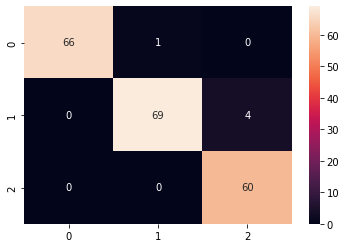

In [ ]:
# MEMBUAT CONFUSION MATRIX KERNEL SVM
grid_svc_matrix = confusion_matrix(Y_test, Y_pred_svc)

# VISUALISASI CONFUSION MATRIX
sns.heatmap(grid_svc_matrix, annot=True)

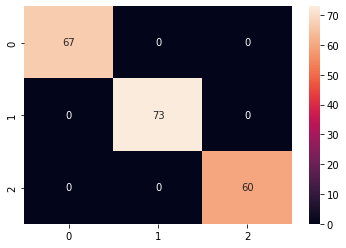

In [ ]:
# MEMBUAT CONFUSION MATRIX NEURAL NETWORK
grid_mlpc_matrix = confusion_matrix(Y_test, Y_pred_mlpc)

# VISUALISASI CONFUSION MATRIX
sns.heatmap(grid_mlpc_matrix, annot=True)

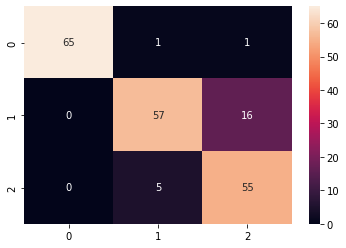

In [ ]:
# MEMBUAT CONFUSION MATRIX NAIVE BAYES
grid_gnb_matrix = confusion_matrix(Y_test, Y_pred_gnb)

# VISUALISASI CONFUSION MATRIX
sns.heatmap(grid_gnb_matrix, annot=True)

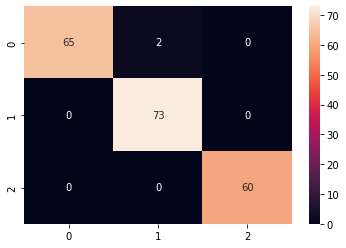

In [ ]:
# MEMBUAT CONFUSION MATRIX KNN
grid_knn_matrix = confusion_matrix(Y_test, Y_pred_knn)

# VISUALISASI CONFUSION MATRIX
sns.heatmap(grid_knn_matrix, annot=True)

PERBANDINGAN SEMUA ALGORITMA

In [ ]:
scores = pd.DataFrame({'Algorithm':['Logistic Regression', 'Linear SVM', 'Decision Tree','Random Forest','Gradient Boosting',
                      'Kernel SVM','Neural Network','Naive Bayes', "K Nearest Neighbour"], 'accuracy':[accuracy_lr, accuracy_svmc, tree_score, forest_score,
                                                               boost_score, accuracy_svc, mlp_score, accuracy_gnb, accuracy_knn]})
scores.sort_values(by ='accuracy', ascending=False)

,Algorithm,accuracy
3,Random Forest,1.000
4,Gradient Boosting,1.000
6,Neural Network,0.995
0,Logistic Regression,0.990
8,K Nearest Neighbour,0.990
1,Linear SVM,0.980
5,Kernel SVM,0.975
7,Naive Bayes,0.885
2,Decision Tree,0.610


In [ ]:
#import evaluation tools
from sklearn.metrics import accuracy_score,precision_score, matthews_corrcoef, confusion_matrix, classification_report

#PERFORMA MODEL MACHINE LEARNING CLASSIFICATION
print('LOGISTIC REGRESSION')
print(classification_report(Y_test, Y_pred_lr))
print("\n\n")

print('LINEAR SVM')
print(classification_report(Y_test, Y_pred_svmc))
print("\n\n")

print('DECISSION TREE')
print(classification_report(Y_test, y_pred_dtMaxDepth1))
print("\n\n")

print('RANDOM FOREST')
print(classification_report(Y_test, Y_pred_rforest))
print("\n\n")

print('GRADIENT BOOSTING')
print(classification_report(Y_test, Y_pred_gboost))
print("\n\n")

print('KERNEL SVM')
print(classification_report(Y_test, Y_pred_svc))
print("\n\n")

print('NEURAL NETWORK')
print(classification_report(Y_test, Y_pred_mlpc))
print("\n\n")

print('NAIVE BAYES')
print(classification_report(Y_test, Y_pred_gnb))
print("\n\n")

print('K NEAREST NEIGHBOUR')
print(classification_report(Y_test, Y_pred_knn))
print("\n\n")

LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.97      0.99        73
           2       1.00      1.00      1.00        60

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200




LINEAR SVM
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        67
           1       1.00      0.95      0.97        73
           2       1.00      1.00      1.00        60

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200




DECISSION TREE
              precision    recall  f1-score   support

           0       0.62      0.99      0.76        67
           1       0.00      0.00      0.00        73
           2       0.62

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
